In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: PFE
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


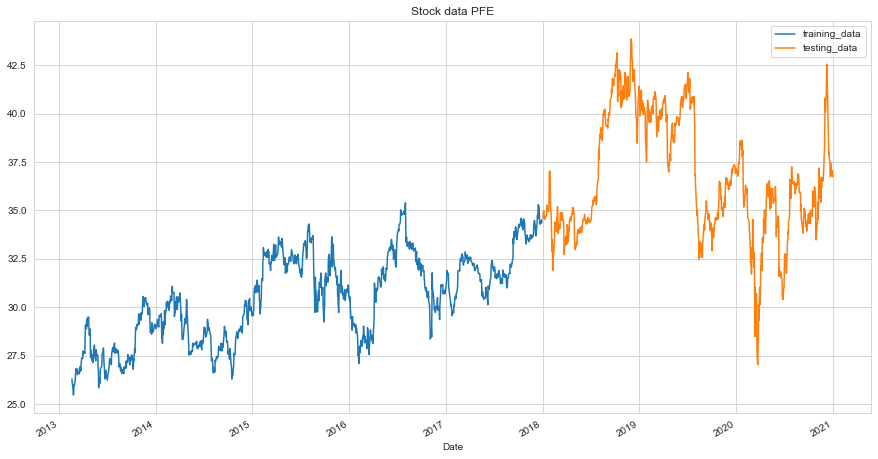

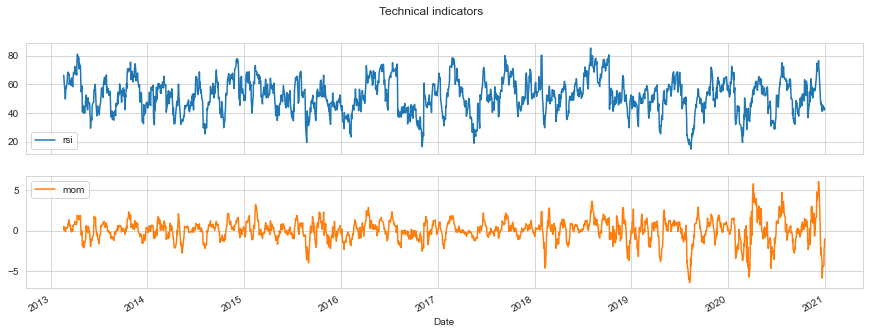

In [2]:
stock_name = 'pfe'.upper()
industry = 'Healthcare'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1132.97, duration: 0:00:00.438757
episode: 2/2000, episode end value: 1114.24, duration: 0:00:00.388087
episode: 3/2000, episode end value: 1124.73, duration: 0:00:00.358082
episode: 4/2000, episode end value: 1152.74, duration: 0:00:00.398086
episode: 5/2000, episode end value: 1152.22, duration: 0:00:00.322074
episode: 6/2000, episode end value: 1122.50, duration: 0:00:00.322075
episode: 7/2000, episode end value: 1144.86, duration: 0:00:00.422090
episode: 8/2000, episode end value: 1153.09, duration: 0:00:00.353085
episode: 9/2000, episode end value: 1141.88, duration: 0:00:00.288060
episode: 10/2000, episode end value: 1142.68, duration: 0:00:00.297067
episode: 11/2000, episode end value: 1133.71, duration: 0:00:00.310048
episode: 12/2000, episode end value: 1134.73, duration: 0:00:00.341102
episode: 13/2000, episode end value: 1148.19, duration: 0:00:00.326074
episode: 14/2000, episode end value: 1127.31, duration: 0:00:00.330075
episode: 15/200

episode: 117/2000, episode end value: 1131.21, duration: 0:00:00.477108
episode: 118/2000, episode end value: 1155.06, duration: 0:00:00.415093
episode: 119/2000, episode end value: 1140.22, duration: 0:00:00.426097
episode: 120/2000, episode end value: 1132.71, duration: 0:00:00.412110
episode: 121/2000, episode end value: 1143.28, duration: 0:00:00.433098
episode: 122/2000, episode end value: 1123.18, duration: 0:00:00.435100
episode: 123/2000, episode end value: 1140.13, duration: 0:00:00.454104
episode: 124/2000, episode end value: 1122.38, duration: 0:00:00.442069
episode: 125/2000, episode end value: 1129.97, duration: 0:00:00.423814
episode: 126/2000, episode end value: 1132.02, duration: 0:00:00.334074
episode: 127/2000, episode end value: 1142.21, duration: 0:00:00.329075
episode: 128/2000, episode end value: 1138.33, duration: 0:00:00.310070
episode: 129/2000, episode end value: 1147.29, duration: 0:00:00.399089
episode: 130/2000, episode end value: 1134.88, duration: 0:00:00

episode: 231/2000, episode end value: 1151.25, duration: 0:00:00.400614
episode: 232/2000, episode end value: 1159.21, duration: 0:00:00.360084
episode: 233/2000, episode end value: 1140.75, duration: 0:00:00.403093
episode: 234/2000, episode end value: 1135.54, duration: 0:00:00.334077
episode: 235/2000, episode end value: 1123.03, duration: 0:00:00.414096
episode: 236/2000, episode end value: 1136.25, duration: 0:00:00.347084
episode: 237/2000, episode end value: 1133.14, duration: 0:00:00.336072
episode: 238/2000, episode end value: 1121.70, duration: 0:00:00.348078
episode: 239/2000, episode end value: 1127.21, duration: 0:00:00.362081
episode: 240/2000, episode end value: 1120.22, duration: 0:00:00.372084
episode: 241/2000, episode end value: 1118.97, duration: 0:00:00.366083
episode: 242/2000, episode end value: 1134.21, duration: 0:00:00.360081
episode: 243/2000, episode end value: 1139.33, duration: 0:00:00.370036
episode: 244/2000, episode end value: 1152.54, duration: 0:00:00

episode: 345/2000, episode end value: 1126.83, duration: 0:00:00.422095
episode: 346/2000, episode end value: 1124.97, duration: 0:00:00.407092
episode: 347/2000, episode end value: 1140.99, duration: 0:00:00.351074
episode: 348/2000, episode end value: 1128.58, duration: 0:00:00.461103
episode: 349/2000, episode end value: 1123.52, duration: 0:00:00.448102
episode: 350/2000, episode end value: 1126.39, duration: 0:00:00.440100
episode: 351/2000, episode end value: 1117.12, duration: 0:00:00.413094
episode: 352/2000, episode end value: 1144.89, duration: 0:00:00.395090
episode: 353/2000, episode end value: 1137.82, duration: 0:00:00.456100
episode: 354/2000, episode end value: 1129.99, duration: 0:00:00.438100
episode: 355/2000, episode end value: 1139.37, duration: 0:00:00.438097
episode: 356/2000, episode end value: 1131.66, duration: 0:00:00.459106
episode: 357/2000, episode end value: 1130.67, duration: 0:00:00.487109
episode: 358/2000, episode end value: 1121.96, duration: 0:00:00

episode: 459/2000, episode end value: 1155.19, duration: 0:00:00.484110
episode: 460/2000, episode end value: 1151.77, duration: 0:00:00.511117
episode: 461/2000, episode end value: 1146.68, duration: 0:00:00.404093
episode: 462/2000, episode end value: 1142.48, duration: 0:00:00.442663
episode: 463/2000, episode end value: 1150.46, duration: 0:00:00.465007
episode: 464/2000, episode end value: 1161.26, duration: 0:00:00.501117
episode: 465/2000, episode end value: 1152.62, duration: 0:00:00.455105
episode: 466/2000, episode end value: 1158.09, duration: 0:00:00.440106
episode: 467/2000, episode end value: 1148.01, duration: 0:00:00.443098
episode: 468/2000, episode end value: 1155.85, duration: 0:00:00.461105
episode: 469/2000, episode end value: 1155.81, duration: 0:00:00.453104
episode: 470/2000, episode end value: 1147.85, duration: 0:00:00.474105
episode: 471/2000, episode end value: 1153.19, duration: 0:00:00.454100
episode: 472/2000, episode end value: 1149.76, duration: 0:00:00

episode: 573/2000, episode end value: 1158.81, duration: 0:00:00.499768
episode: 574/2000, episode end value: 1158.41, duration: 0:00:00.449076
episode: 575/2000, episode end value: 1151.65, duration: 0:00:00.418093
episode: 576/2000, episode end value: 1161.96, duration: 0:00:00.424095
episode: 577/2000, episode end value: 1157.47, duration: 0:00:00.451109
episode: 578/2000, episode end value: 1160.28, duration: 0:00:00.471107
episode: 579/2000, episode end value: 1156.67, duration: 0:00:00.422095
episode: 580/2000, episode end value: 1151.34, duration: 0:00:00.431099
episode: 581/2000, episode end value: 1159.00, duration: 0:00:00.460117
episode: 582/2000, episode end value: 1157.45, duration: 0:00:00.486214
episode: 583/2000, episode end value: 1151.28, duration: 0:00:00.471111
episode: 584/2000, episode end value: 1153.36, duration: 0:00:00.457100
episode: 585/2000, episode end value: 1148.24, duration: 0:00:00.477111
episode: 586/2000, episode end value: 1147.26, duration: 0:00:00

episode: 687/2000, episode end value: 1152.48, duration: 0:00:00.493116
episode: 688/2000, episode end value: 1152.41, duration: 0:00:00.479997
episode: 689/2000, episode end value: 1151.94, duration: 0:00:00.442295
episode: 690/2000, episode end value: 1151.49, duration: 0:00:00.465105
episode: 691/2000, episode end value: 1152.48, duration: 0:00:00.529121
episode: 692/2000, episode end value: 1148.75, duration: 0:00:00.510119
episode: 693/2000, episode end value: 1158.12, duration: 0:00:00.511114
episode: 694/2000, episode end value: 1157.69, duration: 0:00:00.502111
episode: 695/2000, episode end value: 1152.51, duration: 0:00:00.472108
episode: 696/2000, episode end value: 1156.64, duration: 0:00:00.457107
episode: 697/2000, episode end value: 1154.05, duration: 0:00:00.552126
episode: 698/2000, episode end value: 1151.82, duration: 0:00:00.482108
episode: 699/2000, episode end value: 1156.20, duration: 0:00:00.547123
episode: 700/2000, episode end value: 1155.70, duration: 0:00:00

episode: 801/2000, episode end value: 1148.35, duration: 0:00:00.459104
episode: 802/2000, episode end value: 1152.86, duration: 0:00:00.442103
episode: 803/2000, episode end value: 1151.28, duration: 0:00:00.420095
episode: 804/2000, episode end value: 1150.74, duration: 0:00:00.417094
episode: 805/2000, episode end value: 1153.24, duration: 0:00:00.508117
episode: 806/2000, episode end value: 1149.48, duration: 0:00:00.432097
episode: 807/2000, episode end value: 1147.72, duration: 0:00:00.458103
episode: 808/2000, episode end value: 1148.66, duration: 0:00:00.412096
episode: 809/2000, episode end value: 1152.05, duration: 0:00:00.506113
episode: 810/2000, episode end value: 1152.19, duration: 0:00:00.468111
episode: 811/2000, episode end value: 1152.93, duration: 0:00:00.464101
episode: 812/2000, episode end value: 1151.32, duration: 0:00:00.488112
episode: 813/2000, episode end value: 1155.13, duration: 0:00:00.459104
episode: 814/2000, episode end value: 1147.56, duration: 0:00:00

episode: 915/2000, episode end value: 1153.82, duration: 0:00:00.452105
episode: 916/2000, episode end value: 1151.05, duration: 0:00:00.443097
episode: 917/2000, episode end value: 1155.05, duration: 0:00:00.463102
episode: 918/2000, episode end value: 1148.07, duration: 0:00:00.436096
episode: 919/2000, episode end value: 1152.96, duration: 0:00:00.413092
episode: 920/2000, episode end value: 1151.78, duration: 0:00:00.440625
episode: 921/2000, episode end value: 1164.34, duration: 0:00:00.426056
episode: 922/2000, episode end value: 1157.92, duration: 0:00:00.428097
episode: 923/2000, episode end value: 1152.28, duration: 0:00:00.456102
episode: 924/2000, episode end value: 1153.01, duration: 0:00:00.514117
episode: 925/2000, episode end value: 1158.57, duration: 0:00:00.517293
episode: 926/2000, episode end value: 1153.63, duration: 0:00:00.477582
episode: 927/2000, episode end value: 1153.79, duration: 0:00:00.464896
episode: 928/2000, episode end value: 1159.27, duration: 0:00:00

episode: 1029/2000, episode end value: 1160.78, duration: 0:00:00.437097
episode: 1030/2000, episode end value: 1155.74, duration: 0:00:00.451102
episode: 1031/2000, episode end value: 1149.55, duration: 0:00:00.480984
episode: 1032/2000, episode end value: 1153.67, duration: 0:00:00.523738
episode: 1033/2000, episode end value: 1153.01, duration: 0:00:00.438101
episode: 1034/2000, episode end value: 1152.39, duration: 0:00:00.483108
episode: 1035/2000, episode end value: 1156.18, duration: 0:00:00.518118
episode: 1036/2000, episode end value: 1149.46, duration: 0:00:00.549121
episode: 1037/2000, episode end value: 1152.82, duration: 0:00:00.416094
episode: 1038/2000, episode end value: 1153.51, duration: 0:00:00.430097
episode: 1039/2000, episode end value: 1151.94, duration: 0:00:00.416093
episode: 1040/2000, episode end value: 1150.22, duration: 0:00:00.504193
episode: 1041/2000, episode end value: 1156.65, duration: 0:00:00.470103
episode: 1042/2000, episode end value: 1155.00, dur

episode: 1142/2000, episode end value: 1154.04, duration: 0:00:00.489111
episode: 1143/2000, episode end value: 1146.96, duration: 0:00:00.495112
episode: 1144/2000, episode end value: 1150.57, duration: 0:00:00.455105
episode: 1145/2000, episode end value: 1148.13, duration: 0:00:00.504115
episode: 1146/2000, episode end value: 1152.66, duration: 0:00:00.507111
episode: 1147/2000, episode end value: 1155.67, duration: 0:00:00.449099
episode: 1148/2000, episode end value: 1150.71, duration: 0:00:00.534127
episode: 1149/2000, episode end value: 1153.42, duration: 0:00:00.479103
episode: 1150/2000, episode end value: 1148.53, duration: 0:00:00.495107
episode: 1151/2000, episode end value: 1151.30, duration: 0:00:00.542127
episode: 1152/2000, episode end value: 1155.15, duration: 0:00:00.535115
episode: 1153/2000, episode end value: 1157.45, duration: 0:00:00.561128
episode: 1154/2000, episode end value: 1157.76, duration: 0:00:00.483818
episode: 1155/2000, episode end value: 1152.10, dur

episode: 1255/2000, episode end value: 1158.92, duration: 0:00:00.460102
episode: 1256/2000, episode end value: 1156.61, duration: 0:00:00.450103
episode: 1257/2000, episode end value: 1155.87, duration: 0:00:00.459102
episode: 1258/2000, episode end value: 1150.19, duration: 0:00:00.476108
episode: 1259/2000, episode end value: 1150.23, duration: 0:00:00.498112
episode: 1260/2000, episode end value: 1149.53, duration: 0:00:00.496113
episode: 1261/2000, episode end value: 1146.08, duration: 0:00:00.470105
episode: 1262/2000, episode end value: 1170.43, duration: 0:00:00.486888
episode: 1263/2000, episode end value: 1159.73, duration: 0:00:00.576132
episode: 1264/2000, episode end value: 1154.69, duration: 0:00:00.488664
episode: 1265/2000, episode end value: 1155.33, duration: 0:00:00.450984
episode: 1266/2000, episode end value: 1152.34, duration: 0:00:00.475108
episode: 1267/2000, episode end value: 1150.37, duration: 0:00:00.481109
episode: 1268/2000, episode end value: 1151.01, dur

episode: 1368/2000, episode end value: 1150.73, duration: 0:00:00.529121
episode: 1369/2000, episode end value: 1153.18, duration: 0:00:00.497582
episode: 1370/2000, episode end value: 1153.09, duration: 0:00:00.482104
episode: 1371/2000, episode end value: 1152.48, duration: 0:00:00.432097
episode: 1372/2000, episode end value: 1149.41, duration: 0:00:00.421093
episode: 1373/2000, episode end value: 1151.68, duration: 0:00:00.456103
episode: 1374/2000, episode end value: 1147.71, duration: 0:00:00.444103
episode: 1375/2000, episode end value: 1166.59, duration: 0:00:00.467084
episode: 1376/2000, episode end value: 1158.51, duration: 0:00:00.402093
episode: 1377/2000, episode end value: 1155.60, duration: 0:00:00.530117
episode: 1378/2000, episode end value: 1157.14, duration: 0:00:00.494115
episode: 1379/2000, episode end value: 1155.73, duration: 0:00:00.486707
episode: 1380/2000, episode end value: 1157.00, duration: 0:00:00.429558
episode: 1381/2000, episode end value: 1154.79, dur

episode: 1481/2000, episode end value: 1152.82, duration: 0:00:00.434567
episode: 1482/2000, episode end value: 1153.81, duration: 0:00:00.460071
episode: 1483/2000, episode end value: 1151.45, duration: 0:00:00.374086
episode: 1484/2000, episode end value: 1156.99, duration: 0:00:00.448103
episode: 1485/2000, episode end value: 1155.46, duration: 0:00:00.403085
episode: 1486/2000, episode end value: 1155.99, duration: 0:00:00.391089
episode: 1487/2000, episode end value: 1153.93, duration: 0:00:00.418096
episode: 1488/2000, episode end value: 1156.30, duration: 0:00:00.426096
episode: 1489/2000, episode end value: 1154.08, duration: 0:00:00.394090
episode: 1490/2000, episode end value: 1149.15, duration: 0:00:00.366077
episode: 1491/2000, episode end value: 1153.80, duration: 0:00:00.368084
episode: 1492/2000, episode end value: 1157.85, duration: 0:00:00.405093
episode: 1493/2000, episode end value: 1151.77, duration: 0:00:00.428931
episode: 1494/2000, episode end value: 1155.50, dur

episode: 1594/2000, episode end value: 1152.86, duration: 0:00:00.341078
episode: 1595/2000, episode end value: 1156.79, duration: 0:00:00.416088
episode: 1596/2000, episode end value: 1152.80, duration: 0:00:00.401091
episode: 1597/2000, episode end value: 1152.27, duration: 0:00:00.458103
episode: 1598/2000, episode end value: 1152.31, duration: 0:00:00.402093
episode: 1599/2000, episode end value: 1152.20, duration: 0:00:00.384667
episode: 1600/2000, episode end value: 1149.53, duration: 0:00:00.390089
episode: 1601/2000, episode end value: 1154.71, duration: 0:00:00.347075
episode: 1602/2000, episode end value: 1152.30, duration: 0:00:00.333077
episode: 1603/2000, episode end value: 1152.20, duration: 0:00:00.349083
episode: 1604/2000, episode end value: 1157.66, duration: 0:00:00.360306
episode: 1605/2000, episode end value: 1153.99, duration: 0:00:00.368440
episode: 1606/2000, episode end value: 1151.06, duration: 0:00:00.358314
episode: 1607/2000, episode end value: 1153.48, dur

episode: 1707/2000, episode end value: 1155.37, duration: 0:00:00.397089
episode: 1708/2000, episode end value: 1157.09, duration: 0:00:00.378085
episode: 1709/2000, episode end value: 1155.41, duration: 0:00:00.373083
episode: 1710/2000, episode end value: 1155.25, duration: 0:00:00.319071
episode: 1711/2000, episode end value: 1157.85, duration: 0:00:00.348080
episode: 1712/2000, episode end value: 1153.44, duration: 0:00:00.361069
episode: 1713/2000, episode end value: 1151.92, duration: 0:00:00.418101
episode: 1714/2000, episode end value: 1156.91, duration: 0:00:00.422093
episode: 1715/2000, episode end value: 1149.17, duration: 0:00:00.381088
episode: 1716/2000, episode end value: 1155.87, duration: 0:00:00.397084
episode: 1717/2000, episode end value: 1149.01, duration: 0:00:00.359079
episode: 1718/2000, episode end value: 1154.14, duration: 0:00:00.311073
episode: 1719/2000, episode end value: 1152.02, duration: 0:00:00.355079
episode: 1720/2000, episode end value: 1151.99, dur

episode: 1820/2000, episode end value: 1150.24, duration: 0:00:00.280069
episode: 1821/2000, episode end value: 1154.58, duration: 0:00:00.282058
episode: 1822/2000, episode end value: 1146.45, duration: 0:00:00.274068
episode: 1823/2000, episode end value: 1150.91, duration: 0:00:00.280057
episode: 1824/2000, episode end value: 1160.48, duration: 0:00:00.273060
episode: 1825/2000, episode end value: 1149.69, duration: 0:00:00.293067
episode: 1826/2000, episode end value: 1159.46, duration: 0:00:00.282081
episode: 1827/2000, episode end value: 1156.73, duration: 0:00:00.272049
episode: 1828/2000, episode end value: 1159.54, duration: 0:00:00.282066
episode: 1829/2000, episode end value: 1154.98, duration: 0:00:00.287078
episode: 1830/2000, episode end value: 1153.09, duration: 0:00:00.263050
episode: 1831/2000, episode end value: 1150.61, duration: 0:00:00.283069
episode: 1832/2000, episode end value: 1150.65, duration: 0:00:00.274046
episode: 1833/2000, episode end value: 1154.46, dur

episode: 1933/2000, episode end value: 1157.58, duration: 0:00:00.244057
episode: 1934/2000, episode end value: 1154.58, duration: 0:00:00.247063
episode: 1935/2000, episode end value: 1148.59, duration: 0:00:00.236050
episode: 1936/2000, episode end value: 1154.58, duration: 0:00:00.260046
episode: 1937/2000, episode end value: 1154.54, duration: 0:00:00.237049
episode: 1938/2000, episode end value: 1152.64, duration: 0:00:00.250060
episode: 1939/2000, episode end value: 1157.36, duration: 0:00:00.227047
episode: 1940/2000, episode end value: 1156.05, duration: 0:00:00.265047
episode: 1941/2000, episode end value: 1156.86, duration: 0:00:00.252063
episode: 1942/2000, episode end value: 1158.02, duration: 0:00:00.269809
episode: 1943/2000, episode end value: 1154.42, duration: 0:00:00.265070
episode: 1944/2000, episode end value: 1151.35, duration: 0:00:00.264060
episode: 1945/2000, episode end value: 1152.77, duration: 0:00:00.253062
episode: 1946/2000, episode end value: 1154.90, dur

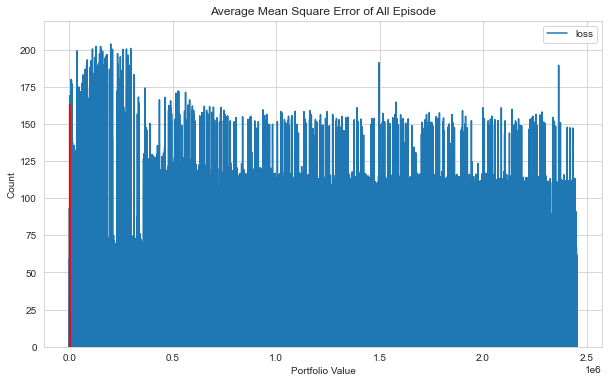

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

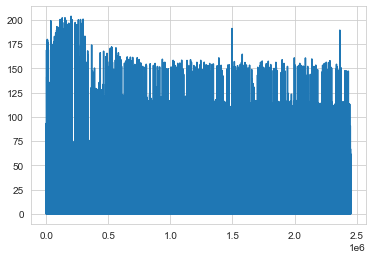

In [5]:
plt.plot(agent.model.losses)

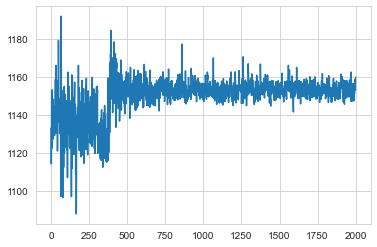

In [6]:
plt.plot(portfolio_value)

episode end value: 1146.58, duration: 0:00:00.133029
Sell: 382 times, Buy: 361 times


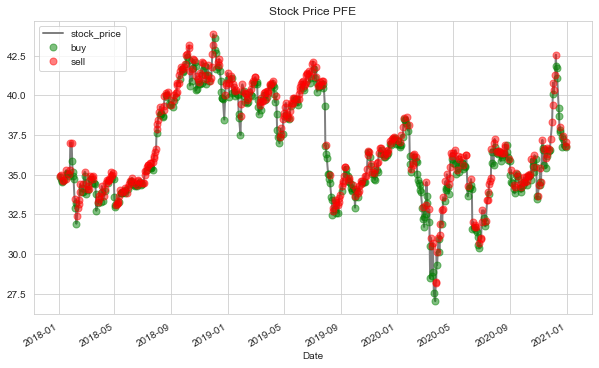

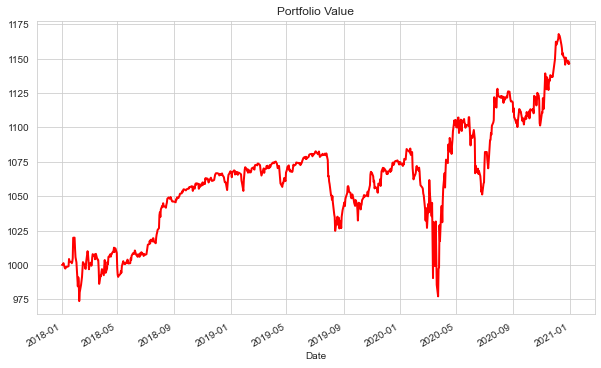

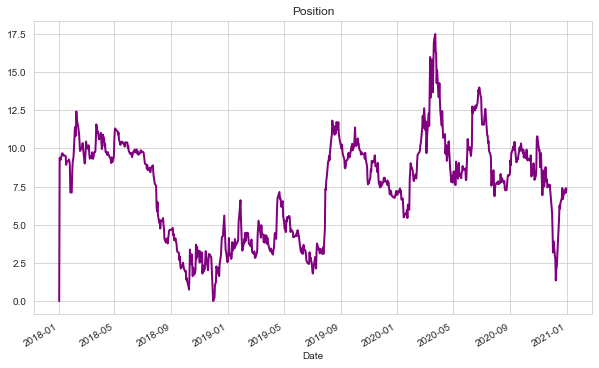

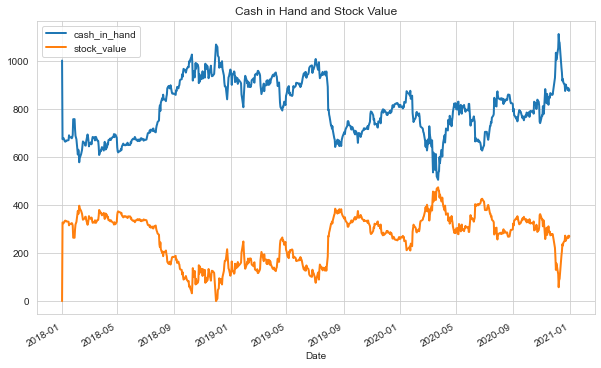

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: PFE
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 4.67 %
Volatility: 0.0822
shape ratio: 0.4337
Maximun drawdown: -9.91 %
Calmar ratio: 0.4708
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 2.11 %
Volatility (benchmark): 0.2613
shape ratio: 0.0387
Maximun drawdown: -38.37 %
Calmar ratio (benchmark): 0.0550


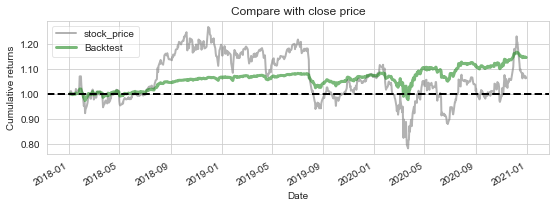

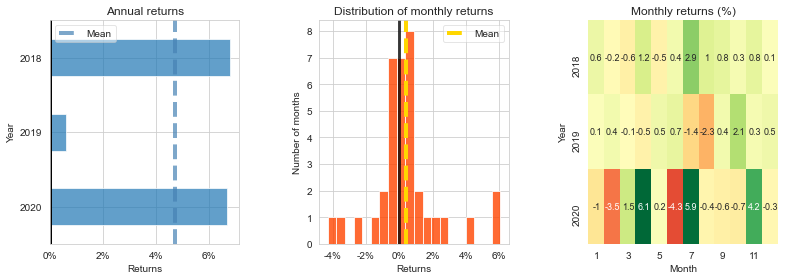

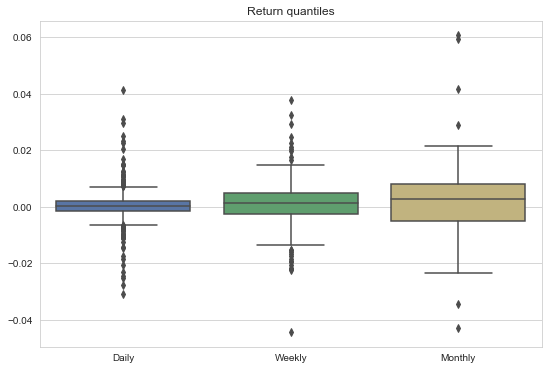

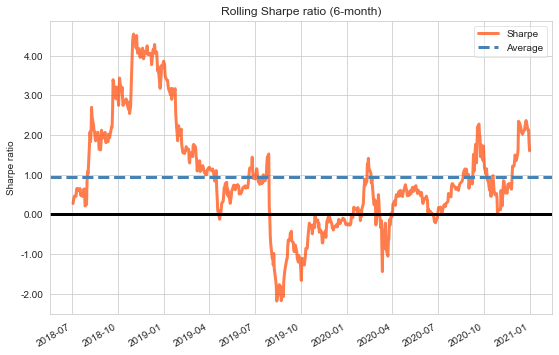

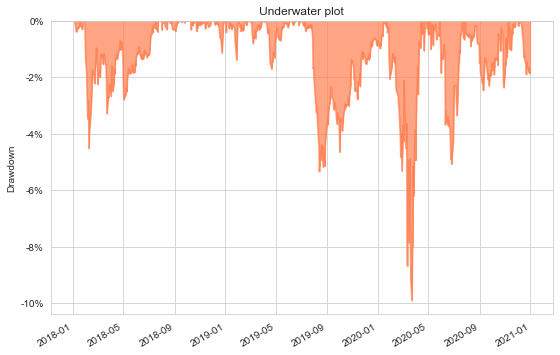

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')